In [2]:
# Import required libraries
import pandas as pd

# Read the CSV file containing the dataset
df_combined = pd.read_csv('GPT4o+manual_231777_20241101.csv')

# Define mapping dictionary to convert numeric sentiment values to text labels
sentiment_mapping = {
    1: 'Positive',
    2: 'Negative', 
    3: 'Neutral',
    4: 'Combination'
}

# Convert numeric sentiment values to text labels using the mapping
df_combined['Sentiment'] = df_combined['Sentiment'].map(sentiment_mapping)

# Convert the 'Day' column to datetime format for time-based operations
df_combined['Day'] = pd.to_datetime(df_combined['Day'])

# Sort the DataFrame chronologically by date
df_combined = df_combined.sort_values(by='Day')

# Reset index after sorting to have clean sequential indices
df_combined = df_combined.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0,1,2,5,9,12,13,16,21,26,27,31,35,36,41,43,53,55,56,57,70,73,74,88,90,93,102,103,106) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
# Dictionary mapping country codes to country names
country_code_to_name = {
    'ABW': 'Aruba', 'AFG': 'Afghanistan', 'AGO': 'Angola', 'AIA': 'Anguilla',
    'ALA': 'Åland Islands', 'ALB': 'Albania', 'AND': 'Andorra', 'ARE': 'United Arab Emirates',
    'ARG': 'Argentina', 'ARM': 'Armenia', 'ASM': 'American Samoa', 'ATA': 'Antarctica',
    'ATF': 'French Southern Territories', 'ATG': 'Antigua and Barbuda', 'AUS': 'Australia',
    'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BDI': 'Burundi', 'BEL': 'Belgium',
    'BEN': 'Benin', 'BES': 'Bonaire', 'BFA': 'Burkina Faso', 'BGD': 'Bangladesh',
    'BGR': 'Bulgaria', 'BHR': 'Bahrain', 'BHS': 'Bahamas', 'BIH': 'Bosnia and Herzegovina',
    'BLM': 'Saint Barthélemy', 'BLR': 'Belarus', 'BLZ': 'Belize', 'BMU': 'Bermuda',
    'BOL': 'Bolivia', 'BRA': 'Brazil', 'BRB': 'Barbados', 'BRN': 'Brunei',
    'BTN': 'Bhutan', 'BWA': 'Botswana', 'CAF': 'Central African Republic', 'CAN': 'Canada',
    'CHE': 'Switzerland', 'CHL': 'Chile', 'CHN': 'China', 'CIV': 'Côte d\'Ivoire',
    'CMR': 'Cameroon', 'COD': 'DR Congo', 'COG': 'Congo', 'COL': 'Colombia',
    'CRI': 'Costa Rica', 'CUB': 'Cuba', 'CYP': 'Cyprus', 'CZE': 'Czech Republic',
    'DEU': 'Germany', 'DNK': 'Denmark', 'DOM': 'Dominican Republic', 'DZA': 'Algeria',
    'ECU': 'Ecuador', 'EGY': 'Egypt', 'ESP': 'Spain', 'EST': 'Estonia',
    'ETH': 'Ethiopia', 'FIN': 'Finland', 'FJI': 'Fiji', 'FRA': 'France',
    'GBR': 'United Kingdom', 'GEO': 'Georgia', 'GHA': 'Ghana', 'GRC': 'Greece',
    'HKG': 'Hong Kong', 'HRV': 'Croatia', 'HUN': 'Hungary', 'IDN': 'Indonesia',
    'IND': 'India', 'IRL': 'Ireland', 'IRN': 'Iran', 'IRQ': 'Iraq',
    'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JAM': 'Jamaica',
    'JOR': 'Jordan', 'JPN': 'Japan', 'KAZ': 'Kazakhstan', 'KEN': 'Kenya',
    'KOR': 'South Korea', 'KWT': 'Kuwait', 'LBN': 'Lebanon', 'LKA': 'Sri Lanka',
    'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'LVA': 'Latvia', 'MAC': 'Macao',
    'MAR': 'Morocco', 'MEX': 'Mexico', 'MYS': 'Malaysia', 'NGA': 'Nigeria',
    'NLD': 'Netherlands', 'NOR': 'Norway', 'NPL': 'Nepal', 'NZL': 'New Zealand',
    'PAK': 'Pakistan', 'PER': 'Peru', 'PHL': 'Philippines', 'POL': 'Poland',
    'PRT': 'Portugal', 'ROU': 'Romania', 'RUS': 'Russia', 'SAU': 'Saudi Arabia',
    'SGP': 'Singapore', 'SRB': 'Serbia', 'SVK': 'Slovakia', 'SVN': 'Slovenia',
    'SWE': 'Sweden', 'THA': 'Thailand', 'TUN': 'Tunisia', 'TUR': 'Turkey',
    'TWN': 'Taiwan', 'UKR': 'Ukraine', 'USA': 'United States', 'VNM': 'Vietnam',
    'ZAF': 'South Africa'
}

def create_interactive_time_series(df):
    # Keep only data with non-empty Country Code
    df_valid = df.dropna(subset=['Country Code']).copy()
    
    # Convert country codes to country names
    df_valid['Country Name'] = df_valid['Country Code'].map(country_code_to_name)
    
    # Calculate total data volume for each country and sort in descending order
    country_counts = df_valid['Country Name'].value_counts()
    countries_with_counts = [(country, count) for country, count in country_counts.items() if pd.notna(country)]
    countries_with_counts.sort(key=lambda x: x[1], reverse=True)
    
    # Preprocess data: aggregate sentiment by month and country
    df_valid['Month'] = pd.to_datetime(df_valid['Day']).dt.to_period('M')
    
    # Create widgets
    metric_selector = widgets.RadioButtons(
        options=['Count', 'Percentage'],
        value='Count',
        description='Metric:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    # Create country selector with data volume information
    country_options = ['All'] + [f"{country} ({count:,} tweets)" 
                               for country, count in countries_with_counts]
    country_values = ['All'] + [country for country, _ in countries_with_counts]
    
    country_selector = widgets.SelectMultiple(
        options=list(zip(country_options, country_values)),
        value=['All'],
        description='Countries/Regions:',
        style={'description_width': 'initial'},
        layout={'width': 'auto', 'height': '200px'}
    )
    
    start_date = widgets.DatePicker(
        description='Start Date:',
        value=pd.to_datetime(df_valid['Day']).min(),
        style={'description_width': 'initial'}
    )
    
    end_date = widgets.DatePicker(
        description='End Date:',
        value=pd.to_datetime(df_valid['Day']).max(),
        style={'description_width': 'initial'}
    )
    
    sentiment_checkboxes = {
        sentiment: widgets.Checkbox(
            value=True,
            description=sentiment,
            indent=False
        ) for sentiment in df_valid['Sentiment'].unique()
    }
    
    # Create fixed FigureWidget
    fig = go.FigureWidget(make_subplots(rows=1, cols=2, 
                                      column_widths=[0.7, 0.3],
                                      specs=[[{"type": "xy"}, {"type": "domain"}]]))
    
    def update_plot(*args):
        # Clear existing traces
        fig.data = []
        
        # Filter data based on selected countries
        if 'All' in country_selector.value:
            df_filtered = df_valid
        else:
            df_filtered = df_valid[df_valid['Country Name'].isin(country_selector.value)]
        
        # Aggregate by month and sentiment
        monthly_sentiment = df_filtered.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)
        
        # Calculate overall sentiment distribution
        total_sentiment = df_filtered['Sentiment'].value_counts()
        total_percentages = (total_sentiment / total_sentiment.sum() * 100).round(1)
        
        # Calculate monthly percentages
        monthly_percentages = monthly_sentiment.div(monthly_sentiment.sum(axis=1), axis=0) * 100
        
        # Convert Month to datetime
        monthly_sentiment.index = monthly_sentiment.index.astype(str).map(lambda x: pd.to_datetime(x + '-01'))
        monthly_percentages.index = monthly_percentages.index.astype(str).map(lambda x: pd.to_datetime(x + '-01'))
        
        # Select data based on metric choice
        if metric_selector.value == 'Count':
            plot_data = monthly_sentiment
            y_title = 'Count'
        else:
            plot_data = monthly_percentages
            y_title = 'Percentage (%)'
        
        # Filter date range
        mask = (plot_data.index >= pd.to_datetime(start_date.value)) & \
               (plot_data.index <= pd.to_datetime(end_date.value))
        plot_data = plot_data[mask]
        
        # Use specified color scheme
        colors = {
            'Positive': '#ef5675',
            'Negative': '#7a5195',
            'Neutral': '#ffa600',
            'Combination': '#003f5c'
        }
        
        # Add line plot traces
        for sentiment, checkbox in sentiment_checkboxes.items():
            if checkbox.value and sentiment in plot_data.columns:
                fig.add_trace(
                    go.Scatter(
                        x=plot_data.index,
                        y=plot_data[sentiment],
                        name=sentiment,
                        line=dict(color=colors.get(sentiment)),
                        mode='lines+markers'
                    ),
                    row=1, col=1
                )
        
        # Add pie chart
        pie_colors = [colors[sentiment] for sentiment in total_percentages.index]
        
        fig.add_trace(
            go.Pie(
                labels=total_percentages.index,
                values=total_percentages.values,
                textinfo='label+percent',
                textposition='inside',
                marker=dict(colors=pie_colors),
                showlegend=False,
                texttemplate="%{label}<br>%{value:.1f}%"
            ),
            row=1, col=2
        )
        
        # Update layout
        title_text = 'Sentiment Trends Over Time'
        if 'All' not in country_selector.value:
            title_text += f' ({", ".join(country_selector.value)})'
            
        fig.update_layout(
            title=dict(
                text=title_text,
                x=0.3,
                xanchor='center'
            ),
            xaxis_title='Time',
            yaxis_title=y_title,
            hovermode='x unified',
            template='plotly_white',
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.7
            ),
            width=1200,
            height=500,
            annotations=[
                dict(
                    text="Overall Sentiment Distribution",
                    showarrow=False,
                    x=0.85,
                    y=1.1,
                    xref='paper',
                    yref='paper',
                    font=dict(size=14)
                )
            ]
        )
        
        # Update line plot x-axis label format
        fig.update_xaxes(tickformat="%Y-%m", row=1, col=1)
    
    # Register update function
    metric_selector.observe(update_plot, 'value')
    country_selector.observe(update_plot, 'value')
    start_date.observe(update_plot, 'value')
    end_date.observe(update_plot, 'value')
    for checkbox in sentiment_checkboxes.values():
        checkbox.observe(update_plot, 'value')
    
    # Create widget layout
    sentiment_box = widgets.VBox([widgets.Label('Sentiments:')] + 
                               list(sentiment_checkboxes.values()),
                               layout={'border': '1px solid #ddd', 'padding': '10px'})
    
    controls = widgets.HBox([
        widgets.VBox([
            metric_selector,
            widgets.HBox([start_date, end_date]),
            country_selector
        ]),
        sentiment_box
    ])
    
    # Display interface
    display(controls)
    display(fig)
    
    # Initial plot update
    update_plot()

def create_event_analysis(df):
    # Create functionality for interface 2
    df_valid = df.dropna(subset=['Country Code']).copy()
    df_valid['Country Name'] = df_valid['Country Code'].map(country_code_to_name)
    
    # Define important events
    events = {
        'Event 1: First Cultured Beef Burger (2013-08-05)': '2013-08-05',
        'Event 2: Singapore Approval (2020-12-02)': '2020-12-02',
        'Event 3: FDA Clearance (2022-11-16)': '2022-11-16'
    }
    
    # Calculate data volume for each country and sort in descending order
    country_counts = df_valid['Country Name'].value_counts()
    total_valid_tweets = len(df_valid)
    countries_with_counts = [(country, count, count/total_valid_tweets*100) 
                           for country, count in country_counts.items() 
                           if pd.notna(country)]
    countries_with_counts.sort(key=lambda x: x[1], reverse=True)
    
    # Create event selection dropdown
    event_selector = widgets.Dropdown(
        options=list(events.items()),
        value=list(events.values())[0],
        description='Event:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    # Create time period selector
    time_period_selector = widgets.Dropdown(
        options=[
            ('31 days before and after', '31_days'),
            ('15 days before and after', '15_days'),
            ('Event day and 2 days after', '3_days')
        ],
        value='31_days',
        description='Time Period:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    # Create country selector with counts and percentages
    country_selector = widgets.SelectMultiple(
        options=['All'] + [f"{country} ({count:,} tweets, {percentage:.1f}%)" 
                         for country, count, percentage in countries_with_counts],
        value=['All'],
        description='Countries/\nRegions:',
        style={'description_width': 'initial'},
        layout={'width': 'auto', 'height': '200px'}
    )
    
    # Create chart
    fig = go.FigureWidget(make_subplots(rows=1, cols=2,
                                      column_widths=[0.7, 0.3],
                                      specs=[[{"type": "xy"}, {"type": "domain"}]]))
    
    # Create output widget for country distribution information
    country_info = widgets.Output()
    
    def update_event_plot(*args):
        # Clear existing traces
        fig.data = []
        country_info.clear_output()
        
        # Select date range based on time period
        event_dt = pd.to_datetime(event_selector.value)
        if time_period_selector.value == '31_days':
            before_start = event_dt - pd.Timedelta('31D')
            after_end = event_dt + pd.Timedelta('30D')
            before_label = 'Pre-event'
            after_label = 'Post-event'
        elif time_period_selector.value == '15_days':
            before_start = event_dt - pd.Timedelta('15D')
            after_end = event_dt + pd.Timedelta('14D')
            before_label = 'Pre-event'
            after_label = 'Post-event'
        else:  # 3_days
            same_days_before = 3
            before_start = event_dt - pd.Timedelta(days=same_days_before)
            after_end = event_dt + pd.Timedelta('2D')
            before_label = 'Pre-event'
            after_label = 'Post-event'
        
        # Create period labels for all tweets
        df_all = df.copy()
        df_all['Period'] = None
        # Before period excludes event day
        df_all.loc[(pd.to_datetime(df_all['Day']) >= before_start) & 
                   (pd.to_datetime(df_all['Day']) < event_dt), 'Period'] = before_label
        # After period includes event day
        df_all.loc[(pd.to_datetime(df_all['Day']) >= event_dt) & 
                   (pd.to_datetime(df_all['Day']) <= after_end), 'Period'] = after_label
        
        # Filter out data without period labels
        df_all = df_all[df_all['Period'].notna()]
        
        # Get selected countries
        selected_countries = [opt.split(' (')[0] for opt in country_selector.value]
        
        # Calculate tweets with country information for each period
        with country_info:
            print("\n--- Country Information Analysis ---\n")
            
            for period in [before_label, after_label]:
                period_df = df_all[df_all['Period'] == period]
                total_tweets = len(period_df)
                tweets_with_country = len(period_df.dropna(subset=['Country Code']))
                
                print(f"\n{period}:")
                print(f"Total tweets: {total_tweets:,}")
                print(f"Tweets with country info: {tweets_with_country:,} ({tweets_with_country/total_tweets*100:.1f}%)")
                
                if tweets_with_country > 0:
                    country_stats = period_df.dropna(subset=['Country Code'])['Country Code'].map(country_code_to_name)
                    
                    # Filter by selected countries if not 'All'
                    if 'All' not in selected_countries:
                        country_stats = country_stats[country_stats.isin(selected_countries)]
                    
                    country_stats = country_stats.value_counts()
                    filtered_tweets = country_stats.sum()
                    
                    print("\nTop 10 countries distribution:")
                    for country, count in country_stats.head(10).items():
                        print(f"{country}: {count:,} tweets ({count/filtered_tweets*100:.1f}%)")
        
        # Filter data based on selected countries
        if 'All' not in selected_countries:
            df_all = df_all[df_all['Country Code'].map(country_code_to_name).isin(selected_countries)]
        
        # Display message if no data available
        if len(df_all) == 0:
            fig.add_annotation(
                text="No data available for the selected period and countries",
                xref="paper", yref="paper",
                x=0.5, y=0.5,
                showarrow=False,
                font=dict(size=14)
            )
            return
        
        # Calculate sentiment distribution for each period
        period_sentiment = df_all.groupby(['Period', 'Sentiment']).size().unstack(fill_value=0)
        period_percentages = period_sentiment.div(period_sentiment.sum(axis=1), axis=0) * 100
        
        # Calculate overall sentiment distribution
        total_sentiment = df_all['Sentiment'].value_counts()
        total_percentages = (total_sentiment / total_sentiment.sum() * 100).round(1)
        
        # Use specified color scheme
        colors = {
            'Positive': '#ef5675',
            'Negative': '#7a5195',
            'Neutral': '#ffa600',
            'Combination': '#003f5c'
        }
        
        # Set period order
        period_order = [before_label, after_label]
        period_percentages = period_percentages.reindex(period_order)
        period_sentiment = period_sentiment.reindex(period_order)
        
        # Add bar chart
        for i, sentiment in enumerate(period_percentages.columns):
            fig.add_trace(
                go.Bar(
                    name=sentiment,
                    x=period_order,
                    y=period_percentages[sentiment],
                    marker_color=colors[sentiment],
                    text=[f'{period_percentages[sentiment][period]:.1f}%<br>({period_sentiment[sentiment][period]:,})' 
                          for period in period_order],
                    textposition='auto',
                ),
                row=1, col=1
            )
        
        # Add pie chart
        fig.add_trace(
            go.Pie(
                labels=total_percentages.index,
                values=total_percentages.values,
                textinfo='label+percent',
                textposition='inside',
                marker=dict(colors=[colors[sent] for sent in total_percentages.index]),
                showlegend=False,
                texttemplate="%{label}<br>%{value:.1f}%"
            ),
            row=1, col=2
        )
        
        # Get current selected event name
        event_name = [k for k, v in events.items() if v == event_selector.value][0]
        
        # Update layout
        title_text = f'Sentiment Analysis Around {event_name}'
        
        fig.update_layout(
            title=dict(
                text=title_text,
                x=0.3,
                xanchor='center'
            ),
            xaxis_title='Time Period',
            yaxis_title='Percentage (%)',
            barmode='group',
            template='plotly_white',
            showlegend=True,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="left",
                x=0.7
            ),
            width=1200,
            height=500,
            annotations=[
                dict(
                    text="Overall Sentiment Distribution",
                    showarrow=False,
                    x=0.85,
                    y=1.1,
                    xref='paper',
                    yref='paper',
                    font=dict(size=14)
                )
            ]
        )
    
    # Register update function
    event_selector.observe(update_event_plot, 'value')
    country_selector.observe(update_event_plot, 'value')
    time_period_selector.observe(update_event_plot, 'value')
    
    # Create widget layout
    controls = widgets.VBox([
        event_selector,
        time_period_selector,
        country_selector
    ])
    
    # Display interface
    display(controls)
    display(fig)
    display(country_info)  # Display country distribution information below chart
    
    # Initial plot update
    update_event_plot()

def create_geo_comparison(df):
    # Define important events
    events = {
        'Event 1: First Cultured Beef Burger (UK vs Non-UK)': {
            'date': '2013-08-05',
            'country': 'GBR',
            'name': 'UK'
        },
        'Event 3: FDA Clearance (US vs Non-US)': {
            'date': '2022-11-16',
            'country': 'USA',
            'name': 'US'
        }
    }
    
    # Create event selection dropdown
    event_selector = widgets.Dropdown(
        options=list(events.keys()),
        description='Event:',
        style={'description_width': 'initial'}
    )
    
    # Create time period selector
    time_period_selector = widgets.Dropdown(
        options=[
            ('31 days after event', '31_days'),
            ('Event day and 2 days after', '3_days')
        ],
        value='31_days',
        description='Time Period:',
        style={'description_width': 'initial'}
    )
    
    # Create figure widget
    fig = go.FigureWidget()
    
    # Create output widget for statistics
    stats_output = widgets.Output()
    
    def update_plot(*args):
        # Clear existing traces and statistics
        fig.data = []
        stats_output.clear_output()
        
        # Get event information
        event_info = events[event_selector.value]
        event_date = pd.to_datetime(event_info['date'])
        country_code = event_info['country']
        country_name = event_info['name']
        
        # Filter data based on selected time period
        if time_period_selector.value == '31_days':
            end_date = event_date + pd.Timedelta(days=30)
        else:  # 3_days
            end_date = event_date + pd.Timedelta(days=2)
            
        mask = (df['Day'] >= event_date) & (df['Day'] <= end_date)
        df_filtered = df[mask].copy()
        
        # Separate local and non-local users
        local_users = df_filtered[df_filtered['Country Code'] == country_code]
        non_local_users = df_filtered[
            (df_filtered['Country Code'].notna()) & 
            (df_filtered['Country Code'] != country_code)
        ]
        
        # Calculate sentiment distributions
        def calculate_sentiment_dist(data):
            sentiment_counts = data['Sentiment'].value_counts()
            total = len(data)
            return (sentiment_counts / total * 100).round(2)
        
        local_sentiment = calculate_sentiment_dist(local_users)
        non_local_sentiment = calculate_sentiment_dist(non_local_users)
        
        # Color scheme
        colors = {
            'Positive': '#ef5675',
            'Negative': '#7a5195',
            'Neutral': '#ffa600',
            'Combination': '#003f5c'
        }
        
        # Add bars for local users
        for sentiment in colors.keys():
            if sentiment in local_sentiment.index:
                fig.add_trace(go.Bar(
                    name=sentiment,
                    x=[f'{country_name} Users'],
                    y=[local_sentiment.get(sentiment, 0)],
                    marker_color=colors[sentiment],
                    text=[f'{local_sentiment.get(sentiment, 0):.1f}%<br>({int(local_users[local_users["Sentiment"]==sentiment].shape[0]):,})'],
                    textposition='auto',
                ))
        
        # Add bars for non-local users
        for sentiment in colors.keys():
            if sentiment in non_local_sentiment.index:
                fig.add_trace(go.Bar(
                    name=sentiment,
                    x=[f'Non-{country_name} Users'],
                    y=[non_local_sentiment.get(sentiment, 0)],
                    marker_color=colors[sentiment],
                    text=[f'{non_local_sentiment.get(sentiment, 0):.1f}%<br>({int(non_local_users[non_local_users["Sentiment"]==sentiment].shape[0]):,})'],
                    textposition='auto',
                    showlegend=False,
                ))
        
        # Update layout
        time_period_text = "31 days" if time_period_selector.value == '31_days' else "3 days"
        fig.update_layout(
            title=f"Sentiment Distribution: {country_name} vs Non-{country_name} Users<br>({time_period_text} from {event_date.strftime('%Y-%m-%d')})",
            yaxis_title="Percentage (%)",
            barmode='group',
            showlegend=True,
            width=1000,
            height=600,
            template='plotly_white',
            legend=dict(
                title="Sentiment",
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1
            )
        )
        
        # Display statistics
        with stats_output:
            print(f"\n{country_name} Users Statistics:")
            print(f"Total tweets: {len(local_users):,}")
            print("\nSentiment Distribution:")
            for sentiment in local_sentiment.index:
                count = len(local_users[local_users['Sentiment']==sentiment])
                print(f"{sentiment}: {local_sentiment[sentiment]:.2f}% ({count:,} tweets)")
                
            print(f"\nNon-{country_name} Users Statistics:")
            print(f"Total tweets: {len(non_local_users):,}")
            print("\nSentiment Distribution:")
            for sentiment in non_local_sentiment.index:
                count = len(non_local_users[non_local_users['Sentiment']==sentiment])
                print(f"{sentiment}: {non_local_sentiment[sentiment]:.2f}% ({count:,} tweets)")
    
    # Register update function
    event_selector.observe(update_plot, 'value')
    time_period_selector.observe(update_plot, 'value')
    
    # Create widget layout
    controls = widgets.VBox([
        event_selector,
        time_period_selector
    ])
    
    # Display interface
    display(controls)
    display(fig)
    display(stats_output)
    
    # Initial plot update
    update_plot()

# Create main interface switching functionality
def create_dashboard(df):
    # Create view switching buttons
    view_selector = widgets.ToggleButtons(
        options=['Overview', 'Event Analysis', 'Geographic Comparison'],
        description='View:',
        style={'description_width': 'initial'},
        layout={'width': 'auto'}
    )
    
    # Create output container
    output = widgets.Output()
    
    def switch_view(change):
        output.clear_output()
        with output:
            if change['new'] == 'Overview':
                create_interactive_time_series(df)
            elif change['new'] == 'Event Analysis':
                create_event_analysis(df)
            else:
                create_geo_comparison(df)
    
    view_selector.observe(switch_view, 'value')
    
    # Display interface
    display(view_selector)
    display(output)
    
    # Initially display Overview
    with output:
        create_interactive_time_series(df)

# Usage example
create_dashboard(df_combined)

ToggleButtons(description='View:', layout=Layout(width='auto'), options=('Overview', 'Event Analysis', 'Geogra…

Output()

Output()

Output()

Output()

# Model Comparisons

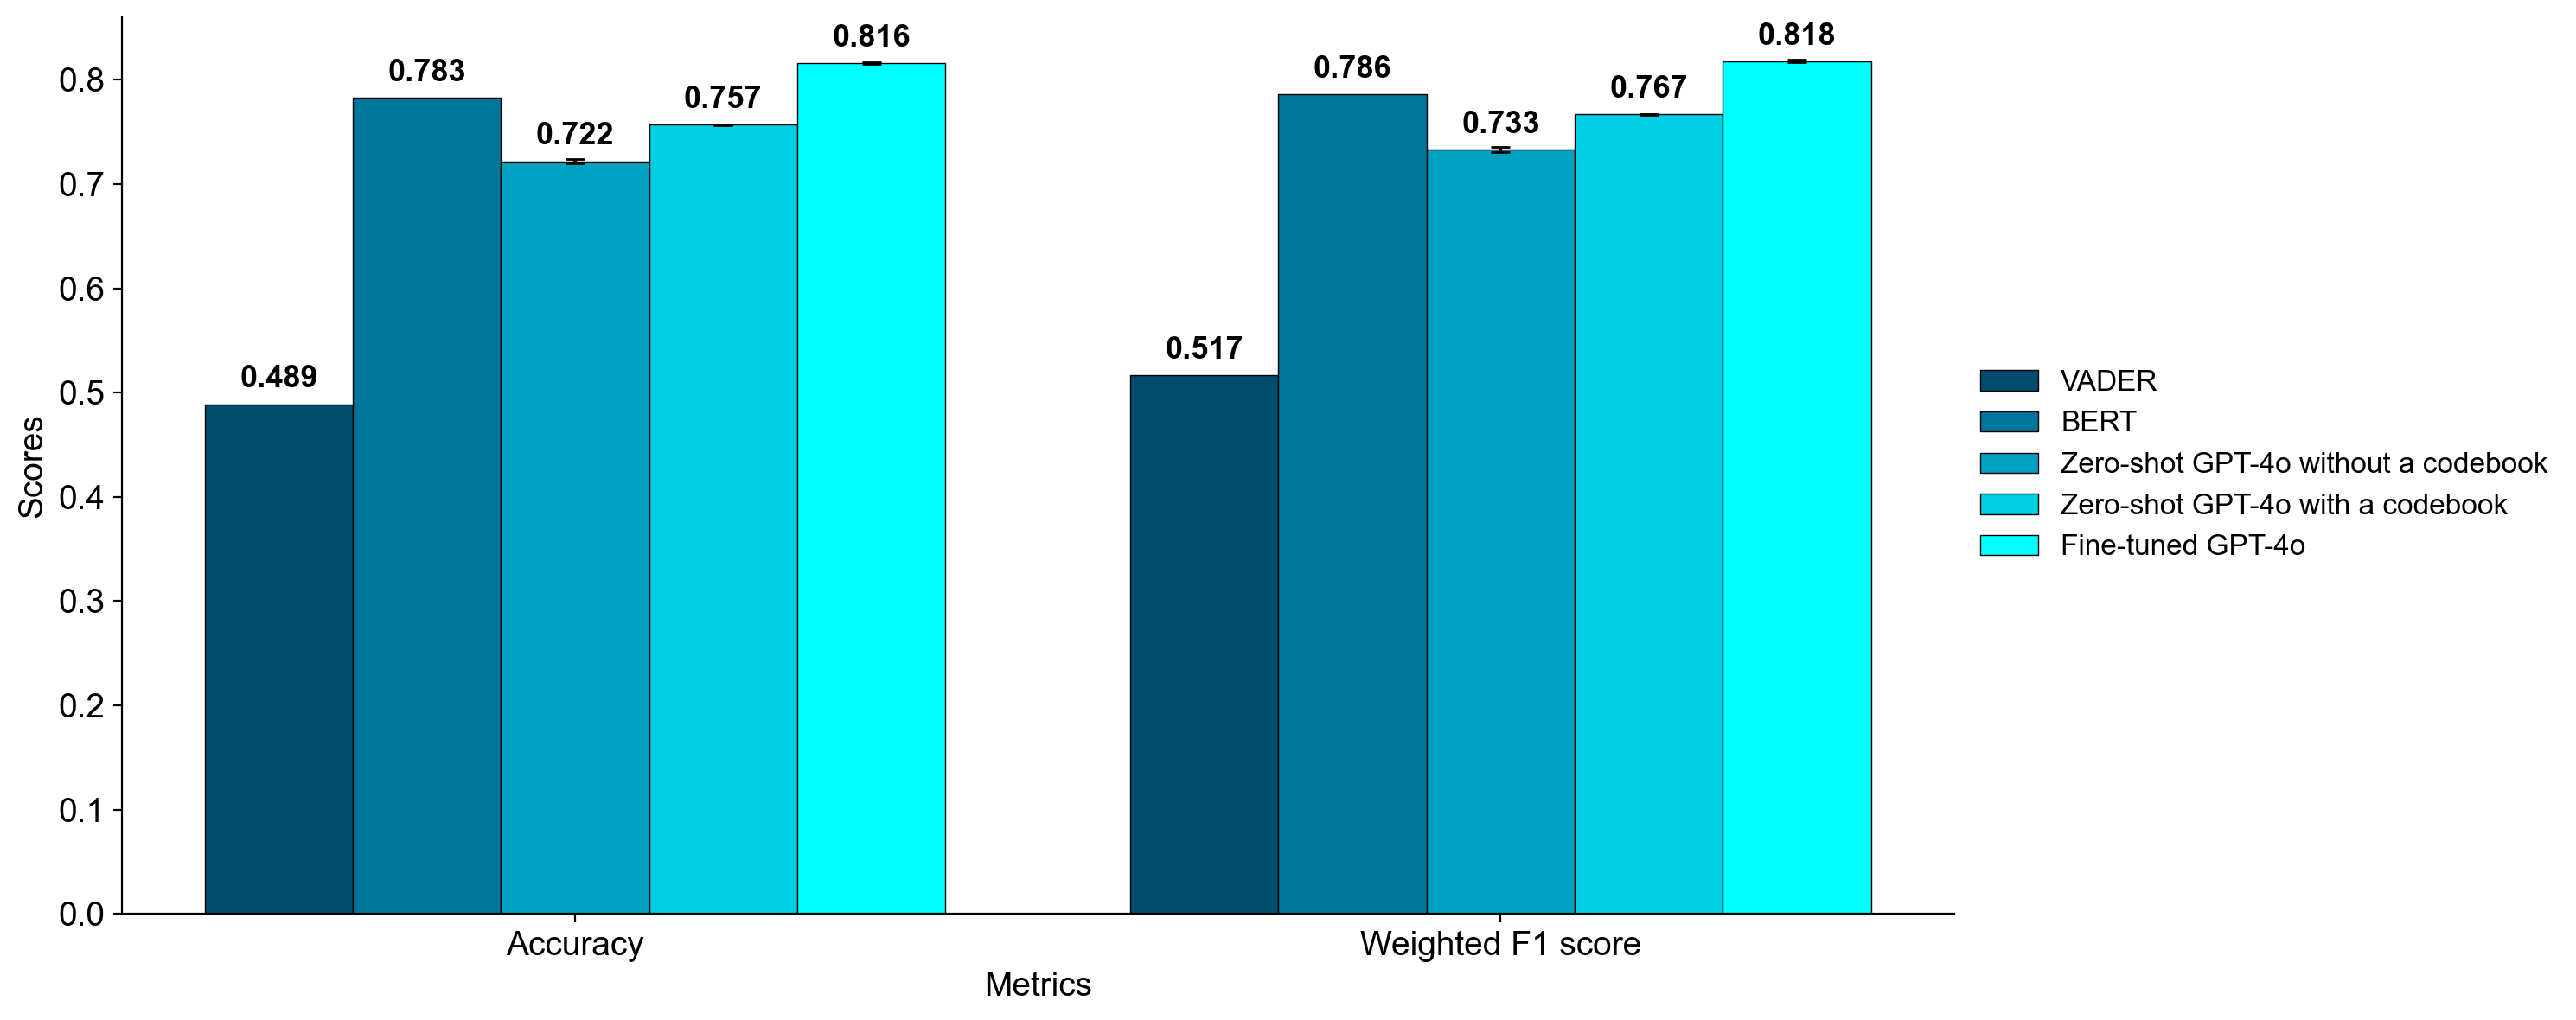

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set font to Arial
plt.rcParams['font.family'] = 'Arial'

# Data with five models
data = {
    'Metrics': ['Accuracy', 'Weighted F1 score'],
    'VADER': [0.489, 0.517],
    'BERT': [0.783, 0.786],
    'Zero-shot GPT-4o without a codebook': [0.722, 0.733],
    'Zero-shot GPT-4o with a codebook': [0.757, 0.767],
    'Fine-tuned GPT-4o': [0.816, 0.818]
}

# Standard deviations for the GPT-4o models
accuracy_sd = [0.0022, 0.0004, 0.0011]  # For the three GPT-4o models
weighted_f1_sd = [0.0023, 0.0003, 0.0011]  # For the three GPT-4o models

# Creating a DataFrame
df = pd.DataFrame(data)

# Transpose the DataFrame for plotting
df = df.set_index('Metrics').transpose()

# Plotting
fig, ax = plt.subplots(figsize=(15, 6), dpi=200)

bar_width = 0.16  # Adjusted bar width for five models
index = np.arange(len(df.columns))

# Updated color palette for the five models
colors = ['#004c6d', '#007599', '#00a1c1', '#00cfe3', '#00ffff']

# Plotting each model with error bars only for GPT-4o models
for i, model in enumerate(df.index):
    if "GPT-4o" in model:  # Check if the model is one of the GPT-4o models
        # Determine the appropriate standard deviation based on the metric
        if "without a codebook" in model:
            yerr = [accuracy_sd[0], weighted_f1_sd[0]]
        elif "with a codebook" in model:
            yerr = [accuracy_sd[1], weighted_f1_sd[1]]
        elif "Fine-tuned" in model:
            yerr = [accuracy_sd[2], weighted_f1_sd[2]]
        else:
            yerr = [0, 0]
        capsize = 4  # Set capsize for error bars
    else:
        yerr = [0, 0]  # No error bars for VADER and BERT
        capsize = 0  # No horizontal lines for VADER and BERT

    ax.bar(
        index + i * bar_width,
        df.loc[model],
        bar_width,
        label=model,
        color=colors[i],
        edgecolor='black',
        linewidth=0.5,
        yerr=yerr,  # Add error bars
        capsize=capsize  # Customize the cap size for error bars
    )

# Customizing x and y ticks
ax.tick_params(axis='x', labelsize=14)  # x-axis ticks font size
ax.tick_params(axis='y', labelsize=14)

# Adding data labels
for i, model in enumerate(df.index):
    for j in range(len(df.columns)):
        height = df.loc[model][j]
        ax.text(
            index[j] + i * bar_width,
            height + 0.01,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=13,
            fontweight='bold'
        )

# Customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(index + bar_width * (len(df.index) - 1) / 2)
ax.set_xticklabels(df.columns)
ax.legend(frameon=False, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

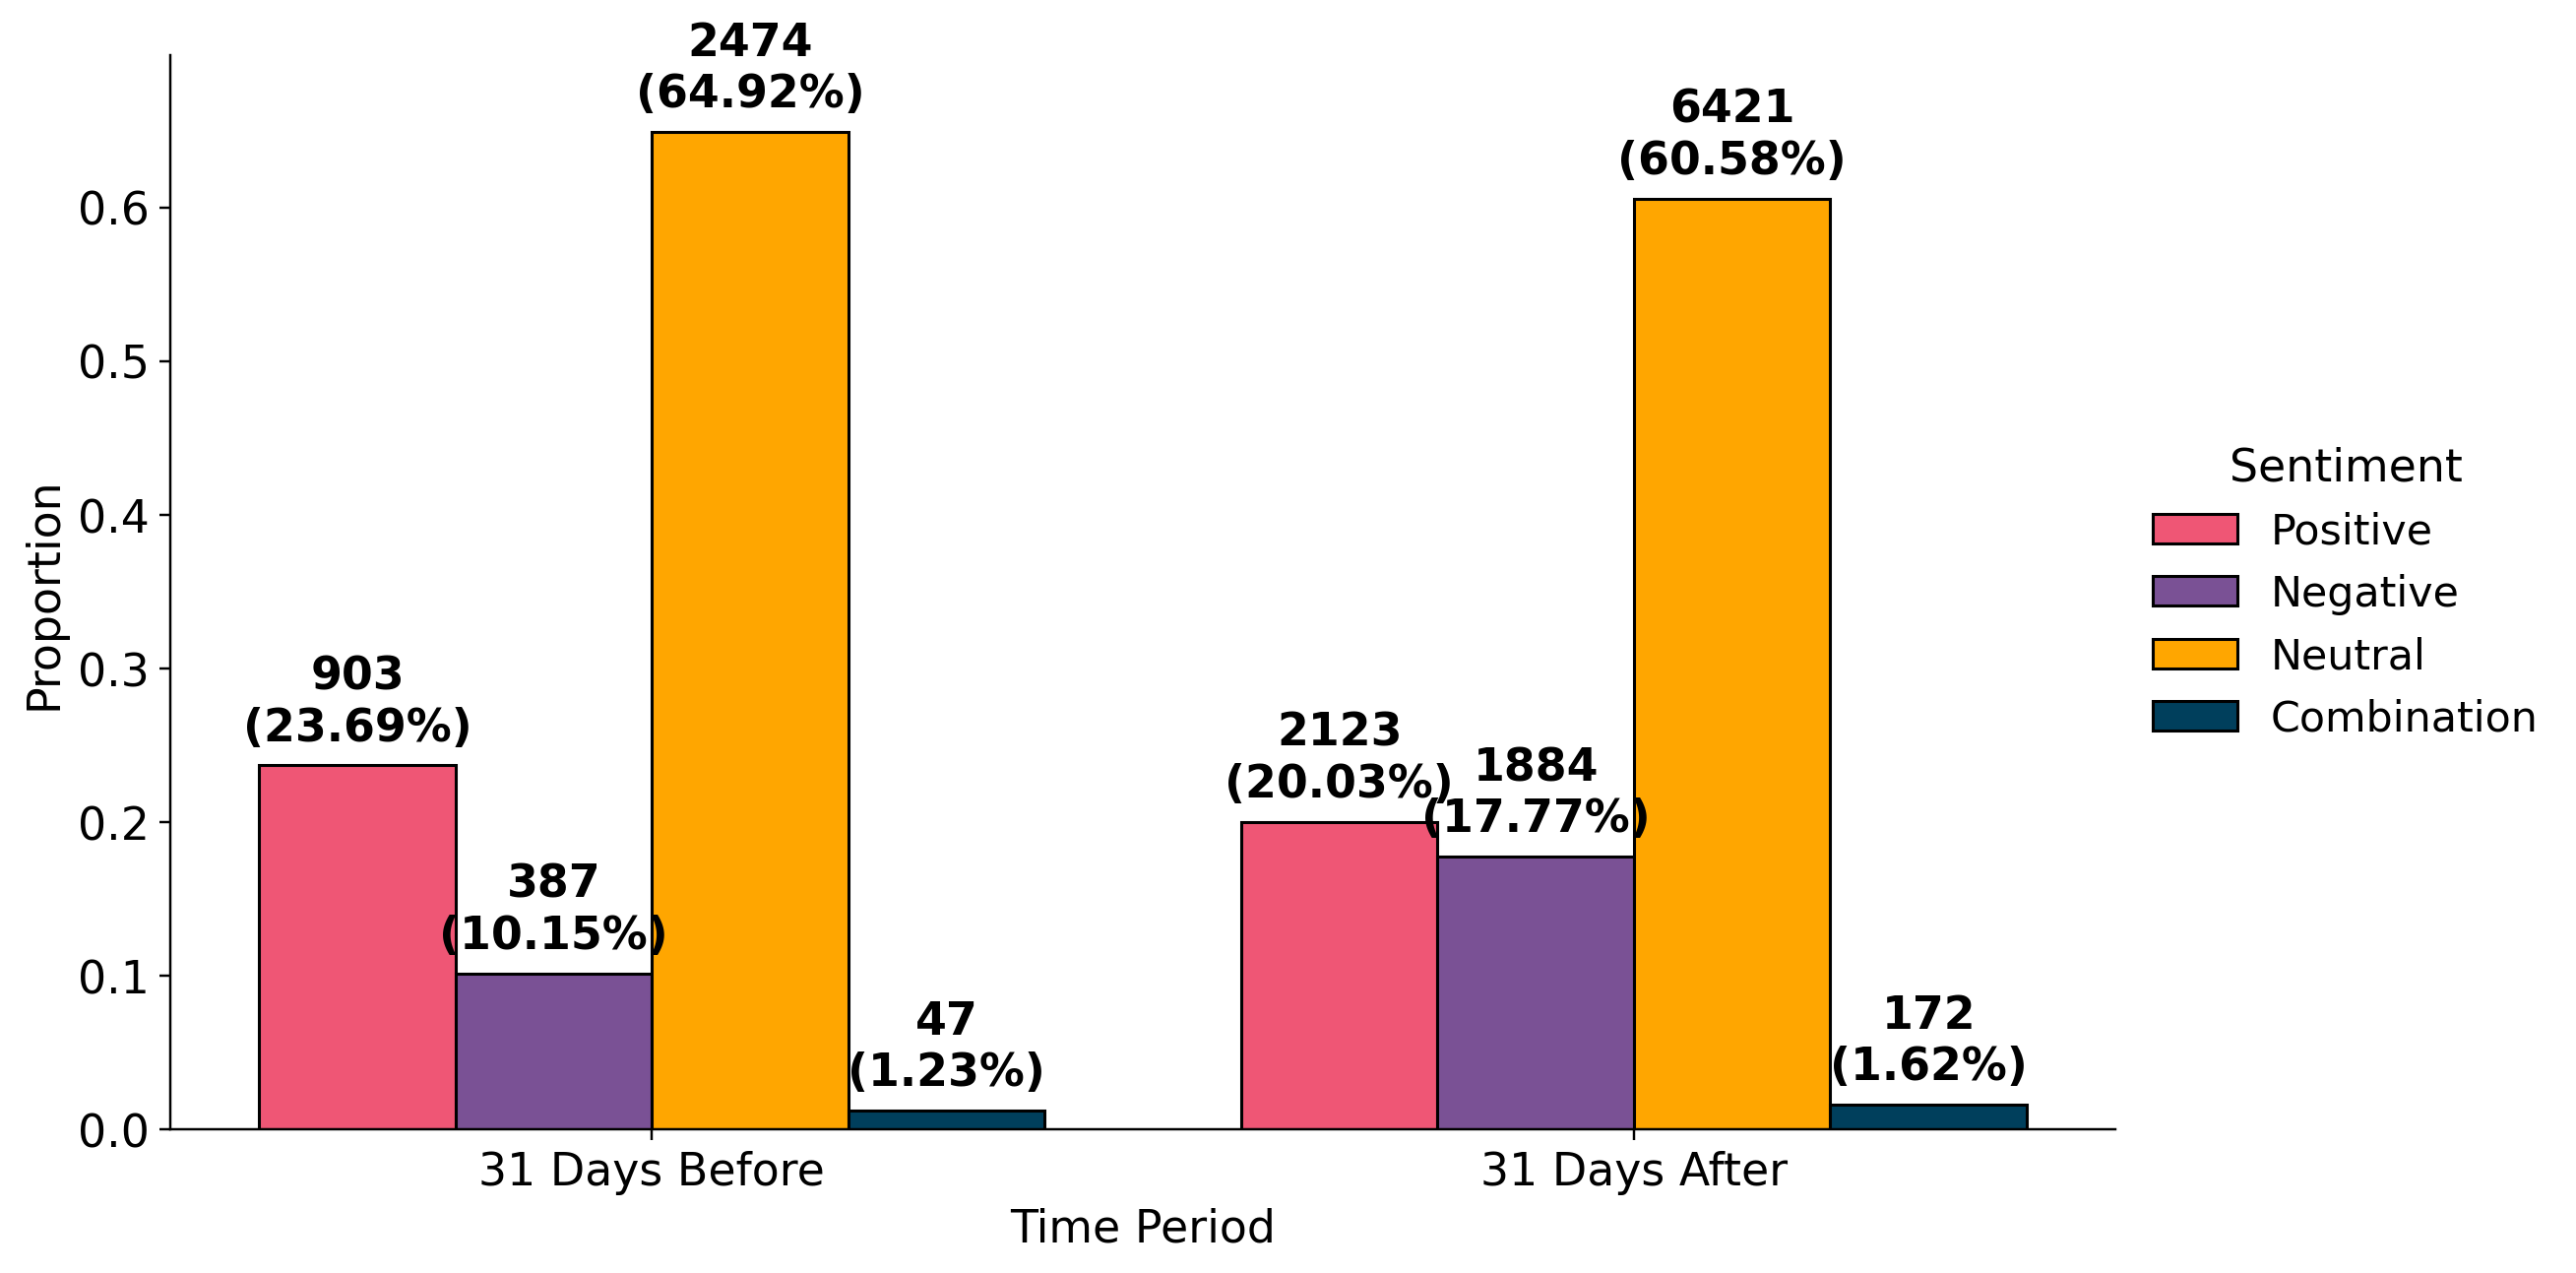

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the reference date
reference_date = pd.to_datetime('2022-11-17')

# Filter data for the 31 days before the reference date
start_date_before = reference_date - pd.Timedelta(days=31)
end_date_before = reference_date - pd.Timedelta(days=1)
df_before = df_combined[(df_combined['Day'] >= start_date_before) & (df_combined['Day'] <= end_date_before)]

# Filter data for the reference date and the following 31 days
start_date_after = reference_date
end_date_after = reference_date + pd.Timedelta(days=31)
df_after = df_combined[(df_combined['Day'] >= start_date_after) & (df_combined['Day'] <= end_date_after)]

# Include 'Neutral' and 'Combination' sentiments in the analysis
sentiments_of_interest = ['Positive', 'Negative', 'Neutral', 'Combination']

total_tweets_before = df_before.shape[0]
total_tweets_after = df_after.shape[0]

# Calculate sentiment proportions including Neutral and Combination
sentiment_counts_before = df_before['Sentiment'].value_counts().reindex(sentiments_of_interest, fill_value=0)
sentiment_counts_after = df_after['Sentiment'].value_counts().reindex(sentiments_of_interest, fill_value=0)

sentiment_proportions_before = (sentiment_counts_before / total_tweets_before).reindex(sentiments_of_interest, fill_value=0)
sentiment_proportions_after = (sentiment_counts_after / total_tweets_after).reindex(sentiments_of_interest, fill_value=0)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Before_Count': sentiment_counts_before,
    'After_Count': sentiment_counts_after,
    'Before_Proportion': sentiment_proportions_before,
    'After_Proportion': sentiment_proportions_after
}, index=sentiments_of_interest)

# Plot settings
colors = ['#ef5675', '#7a5195', '#ffa600', '#003f5c']  # Colors for Positive, Negative, Neutral, Combination

# Plot the proportions of tweets by time period, grouped by sentiment
fig, ax = plt.subplots(figsize=(12, 6), dpi=220)

bar_width = 0.2
x = [0, 1]  # Positions for Before and After on the x-axis

# Plot bars for each sentiment within Before and After
for i, sentiment in enumerate(sentiments_of_interest):
    ax.bar([p + (i - 1.5) * bar_width for p in x], plot_data.loc[sentiment, ['Before_Proportion', 'After_Proportion']], 
           bar_width, label=sentiment, color=colors[i], edgecolor='black')
    
    # Annotate each bar with the count and proportion
    for j, period in enumerate(['Before_Proportion', 'After_Proportion']):
        position = x[j] + (i - 1.5) * bar_width
        count = plot_data.loc[sentiment, f'{period.split("_")[0]}_Count']
        proportion = plot_data.loc[sentiment, period]
        ax.text(position, proportion + 0.01, f'{count}\n({proportion:.2%})', ha='center', va='bottom', fontsize=15,fontweight='bold')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(['31 Days Before', '31 Days After'])

# Add chart title and axis labels
ax.set_xlabel('Time Period', fontsize=15)
ax.set_ylabel('Proportion', fontsize=15)

# Move legend to the right and remove the legend border
ax.legend(title='Sentiment',title_fontsize=15, fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Adjust the font size of x and y ticks
ax.tick_params(axis='x', labelsize=15)  # Change the x-axis tick font size
ax.tick_params(axis='y', labelsize=15)  # Change the y-axis tick font size
# Adjust y-axis limit to prevent labels from being cut off
ax.set_ylim(0, plot_data[['Before_Proportion', 'After_Proportion']].max().max() + 0.05)

# Adjust layout for better display
plt.tight_layout()

# Display the chart
plt.show()